<a href="https://colab.research.google.com/github/CharlyPierce/Regression/blob/main/REG_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Regresion Lineal simplle en PYTHON
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dse=pd.read_csv('Advertising.csv')
ds=dse
ds.head(1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1


In [ ]:
#Buscar relacion lineal entre el gasto de TV y ventas
import patsy
from statsmodels.formula import api#crear modelo lineal
lm=api.ols(formula='Sales~TV',data=ds).fit()#ojo con los guiones-~

In [ ]:
lm.params#intercept=a  de y=a+bx
#b=TV       y=7.032594+0.047537*TV

Intercept    7.032594
TV           0.047537
dtype: float64

In [ ]:
#veamos un p-valor con significancia =0.05
lm.pvalues#como los p-valores son menores que signif. se acepta H1
#donde H1: b=!0

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [ ]:
#eficacia del modelo medida con R^2
lm.rsquared

0.611875050850071

In [ ]:
#eficacia del modelo del R^2 ajustado
lm.rsquared_adj

0.6099148238341623

In [ ]:
#viendo todo en conjunto
lm.summary()
#AIC indicador de criterio bayesiano Entre mas alto mejor
#BIC indicador de criterio de acaique

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 11 May 2020   Prob (F-statistic):           1.47e-42
Time:                        06:20:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#predecir ventas
y_pre=lm.predict(ds[['TV']])

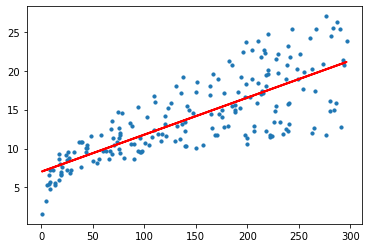

In [ ]:
plt.scatter(ds['TV'].values,ds['Sales'].values,s=10)
plt.plot(ds['TV'].values,y_pre,c='red',linewidth=2)

In [ ]:
#Error Estandar Residual
ds['sales_pred']=7.032594+0.047537*ds['TV']
ds['RSE']=(ds['Sales']-ds['sales_pred'])**2
SSD=sum(ds['RSE'])
RSE=np.sqrt(SSD/(len(ds)-2))
SSD,RSE

(2102.5305838896525, 3.258656369238098)

In [ ]:
sales_m=ds['Sales'].mean()
error=RSE/sales_m
error#23% no queda esplicado en la prediccion
#radio de error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

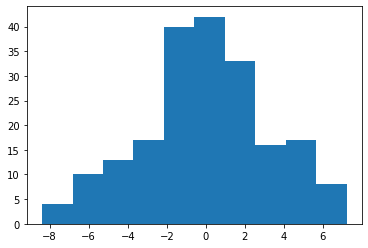

In [ ]:
plt.hist(ds['Sales']-ds['sales_pred'])#el error sigue desv std